# Heart Failure Dataset, Pandas, and ML

In [1]:
import pandas as pd

/home/irfan/.local/share/virtualenvs/pandas-IIxn-Q33/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
data.shape

(918, 12)

In [6]:
data_vals = data.values

In [7]:
len(data_vals)

918

In [8]:
data.value_counts()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease
28   M    ATA            130        132          0          LVH         185    N               0.0      Up        0               1
58   M    ASY            128        216          0          LVH         131    Y               2.2      Flat      1               1
                         130        0            0          ST          100    Y               1.0      Flat      1               1
                                    263          0          Normal      140    Y               2.0      Flat      1               1
                         132        458          1          Normal      69     N               1.0      Down      0               1
                                                                                                                                 ..
50   M    ASY            150        215          0          Normal      140    Y 

In [9]:

no_desies = data[data['HeartDisease']==0]

In [10]:
no_desies.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0


In [11]:
diseased = data[data['HeartDisease']==1]
diseased.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
11,58,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1
13,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat,1


#### let's devide our dataset's columns according to categories
*symptom columns*
-   ChestPainType, RestingBP, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope

*factors columns*
-   Age, Sex, RestingBP, Cholesterol, FastingBS, MaxHR

our columns which may affect as factores are:
Age, Sex, RestingBP, Cholesterol, FastingBS, MaxHR

In [12]:
# getting by labe
fators_data = data.loc[:,['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'HeartDisease']]

In [13]:
fators_data

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,HeartDisease
0,40,M,140,289,0,172,0
1,49,F,160,180,0,156,1
2,37,M,130,283,0,98,0
3,48,F,138,214,0,108,1
4,54,M,150,195,0,122,0
...,...,...,...,...,...,...,...
913,45,M,110,264,0,132,1
914,68,M,144,193,1,141,1
915,57,M,130,131,0,115,1
916,57,F,130,236,0,174,1


In [14]:
fators_data.shape

(918, 7)

In [15]:
fators_data = fators_data[fators_data['FastingBS']>0]

In [16]:
fators_data.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,HeartDisease
36,65,M,140,306,1,87,1
38,48,F,120,177,1,148,0
52,45,M,140,224,1,122,0
84,56,M,150,213,1,125,1
86,65,M,170,263,1,112,1


In [17]:
diseased_factors = fators_data[fators_data['HeartDisease']!= 0]
diseased_factors.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,HeartDisease
36,65,M,140,306,1,87,1
84,56,M,150,213,1,125,1
86,65,M,170,263,1,112,1
103,40,M,120,466,1,152,1
117,59,F,130,338,1,130,1


In [18]:
sexratio = diseased_factors.groupby(by='Sex').size()
sexratio

Sex
F     16
M    154
dtype: int64

In [19]:
import matplotlib.pyplot as plt
sexratio.cumsum()

Sex
F     16
M    170
dtype: int64

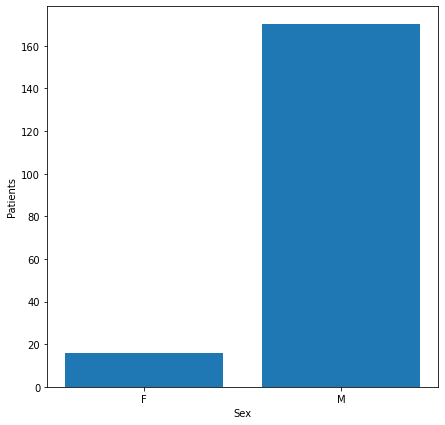

In [20]:
plt.figure(figsize=(7, 7))
plt.bar(sexratio.index, sexratio.cumsum())
# plt.legend(sexratio.index)
plt.xlabel("Sex")
plt.ylabel("Patients")
plt.savefig('sex_factor.png')
plt.show()

In [21]:
ageratio = diseased_factors.groupby(by='Age').size()
ageratio

Age
32     1
34     1
35     1
36     1
38     3
40     3
41     2
42     1
43     3
46     2
47     3
48     6
50     2
51     8
52     5
53     6
54     5
55     6
56    13
57    11
58     8
59     8
60    10
61     9
62    10
63     7
64     6
65     6
66     2
67     4
68     4
69     6
70     1
72     1
74     4
75     1
dtype: int64

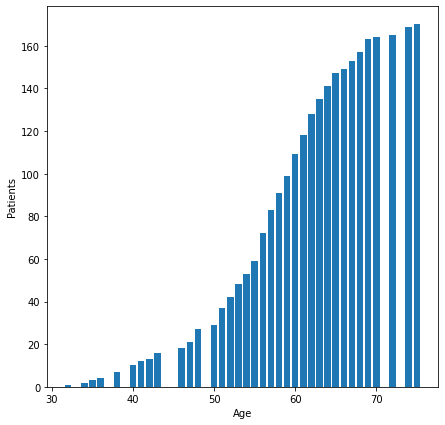

In [22]:
plt.figure(figsize=(7, 7))
plt.bar(ageratio.index, ageratio.cumsum())
# plt.legend(sexratio.index)
plt.xlabel("Age")
plt.ylabel("Patients")
plt.savefig('age_factor.png')
plt.show()

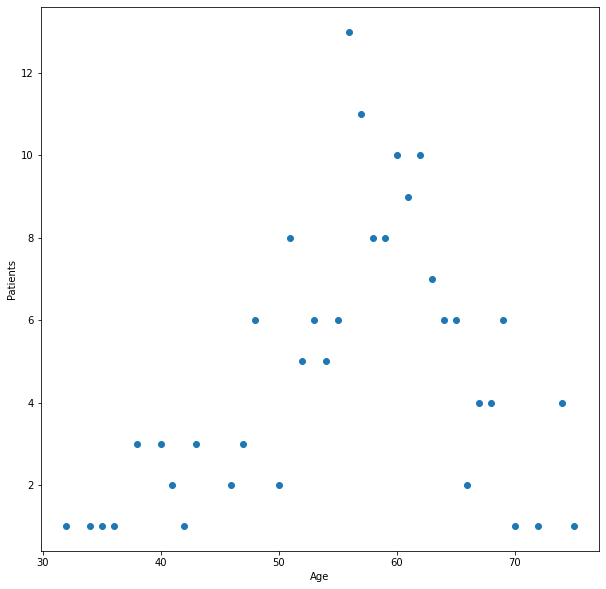

In [23]:
plt.figure(figsize=(10,10))
plt.scatter(ageratio.index, ageratio)
plt.xlabel("Age")
plt.ylabel("Patients")
plt.savefig('sexfactorscatter.png')
plt.show()

In [24]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [25]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [29]:
up_1=data[(data['ST_Slope']=='Up') & (data['HeartDisease']==1)]
up_1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
299,47,M,ASY,110,0,1,ST,149,N,2.1,Up,1
302,53,M,ASY,125,0,1,Normal,120,N,1.5,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
873,64,M,NAP,140,335,0,Normal,158,N,0.0,Up,1
889,59,M,TA,134,204,0,Normal,162,N,0.8,Up,1
893,57,M,ATA,154,232,0,LVH,164,N,0.0,Up,1
899,61,M,ASY,148,203,0,Normal,161,N,0.0,Up,1


In [30]:
up_0=data[(data['ST_Slope']=='Up') & (data['HeartDisease']==0)]
up_0

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
898,35,M,ATA,122,192,0,Normal,174,N,0.0,Up,0
903,56,M,ATA,130,221,0,LVH,163,N,0.0,Up,0
906,55,F,ATA,132,342,0,Normal,166,N,1.2,Up,0
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0


In [31]:
down_1=data[(data['ST_Slope']=='Down') & (data['HeartDisease']==1)]
down_1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
247,48,M,ASY,122,275,1,ST,150,Y,2.0,Down,1
303,62,F,ASY,120,0,1,ST,123,Y,1.7,Down,1
309,57,M,ASY,95,0,1,Normal,182,N,0.7,Down,1
323,62,M,ASY,115,0,1,Normal,128,Y,2.5,Down,1
325,42,M,ASY,105,0,1,Normal,128,Y,-1.5,Down,1
329,60,M,ASY,130,0,1,ST,130,Y,1.1,Down,1
339,64,F,ASY,95,0,1,Normal,145,N,1.1,Down,1
340,43,M,ASY,100,0,1,Normal,122,N,1.5,Down,1
341,64,M,ASY,110,0,1,Normal,114,Y,1.3,Down,1
352,56,M,ASY,120,0,0,ST,100,Y,-1.0,Down,1


In [32]:
down_0 = data[(data['ST_Slope']=='Down') & (data['HeartDisease']==0)]
down_0

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
307,53,M,ATA,130,0,0,ST,120,N,0.7,Down,0
314,53,M,ASY,80,0,0,Normal,141,Y,2.0,Down,0
434,63,M,ASY,126,0,0,ST,120,N,1.5,Down,0
496,58,M,ASY,132,458,1,Normal,69,N,1.0,Down,0
556,75,M,ASY,160,310,1,Normal,112,Y,2.0,Down,0
679,63,M,TA,145,233,1,LVH,150,N,2.3,Down,0
702,59,M,TA,178,270,0,LVH,145,N,4.2,Down,0
733,66,F,TA,150,226,0,Normal,114,N,2.6,Down,0
739,54,M,NAP,125,273,0,LVH,152,N,0.5,Down,0
750,46,F,NAP,142,177,0,LVH,160,Y,1.4,Down,0


In [33]:
flat_1=data[(data['ST_Slope']=='Flat') & (data['HeartDisease']==1)]
flat_1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
11,58,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1
13,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1


In [34]:
flat_0=data[(data['ST_Slope']=='Flat') & (data['HeartDisease']==0)]


In [49]:
flat_1.loc[(flat_1['ExerciseAngina']=='N'), 'ExerciseAngina']=0
flat_1.loc[(flat_1['ExerciseAngina']=='Y'), 'ExerciseAngina']=1
# flat_1.loc[:, ['ExerciseAngina']=='Y']
flat_1.head()

/home/irfan/.local/share/virtualenvs/pandas-IIxn-Q33/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,0,1.0,Flat,1
3,48,F,ASY,138,214,0,Normal,108,1,1.5,Flat,1
8,37,M,ASY,140,207,0,Normal,130,1,1.5,Flat,1
11,58,M,ATA,136,164,0,ST,99,1,2.0,Flat,1
13,49,M,ASY,140,234,0,Normal,140,1,1.0,Flat,1


<AxesSubplot:>

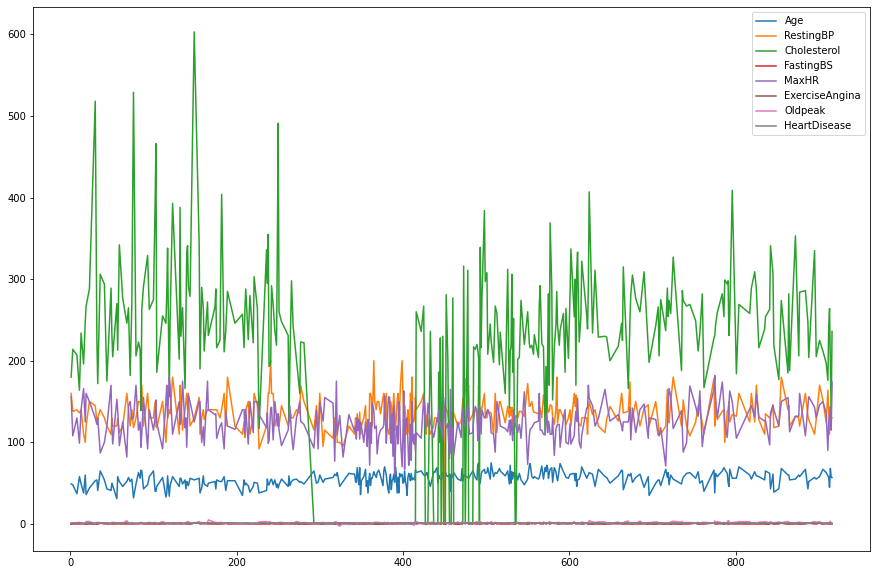

In [50]:
flat_1.plot(figsize=(15,10))

<AxesSubplot:xlabel='HeartDisease'>

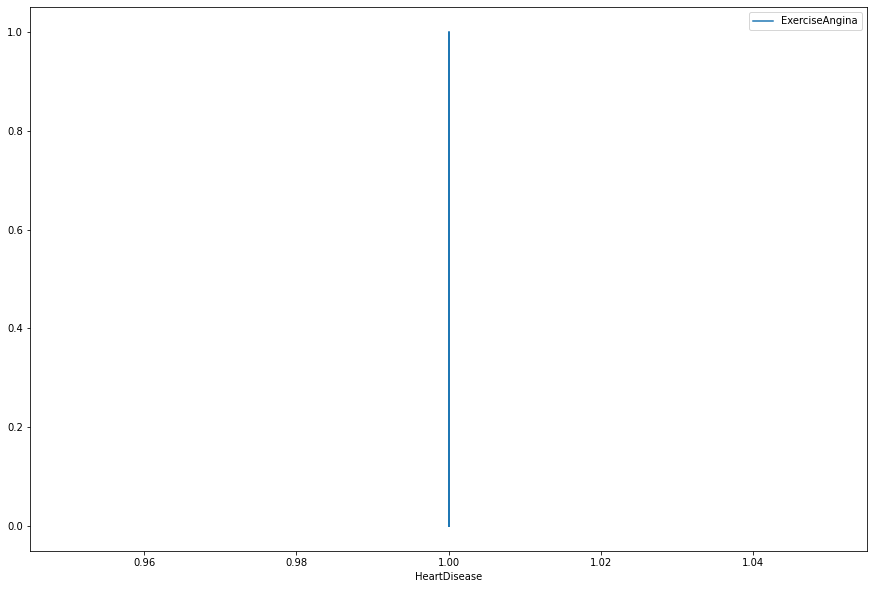

In [54]:
flat_1.plot(x='HeartDisease', y='ExerciseAngina', figsize=(15,10))

In [56]:
flat_1.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,0,1.0,Flat,1
3,48,F,ASY,138,214,0,Normal,108,1,1.5,Flat,1
8,37,M,ASY,140,207,0,Normal,130,1,1.5,Flat,1
11,58,M,ATA,136,164,0,ST,99,1,2.0,Flat,1
13,49,M,ASY,140,234,0,Normal,140,1,1.0,Flat,1
16,38,M,ASY,110,196,0,Normal,166,0,0.0,Flat,1
18,60,M,ASY,100,248,0,Normal,125,0,1.0,Flat,1
19,36,M,ATA,120,267,0,Normal,160,0,3.0,Flat,1
23,44,M,ATA,150,288,0,Normal,150,1,3.0,Flat,1
30,53,M,NAP,145,518,0,Normal,130,0,0.0,Flat,1


In [64]:
new_flat_no_angina = flat_1.loc[flat_1['ExerciseAngina']==0, ['Age', 'Cholesterol', 'ChestPainType', 'RestingBP', 'MaxHR']]
print(new_flat_no_angina.shape)
new_flat_no_angina.head(10)

(135, 5)


,Age,Cholesterol,ChestPainType,RestingBP,MaxHR
1,49,180,NAP,160,156
16,38,196,ASY,110,166
18,60,248,ASY,100,125
19,36,267,ATA,120,160
30,53,518,NAP,145,130
32,54,224,ASY,125,122
33,41,172,ASY,130,130
49,41,289,ASY,110,170
57,58,213,NAP,130,140
72,52,182,ASY,120,150
